<a href="https://colab.research.google.com/github/azarmlengineer/azarmlengineer/blob/main/projects/product_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/content/sample_data/Order_details-masked.csv')

In [4]:
dataset.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [5]:
dataset.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [7]:
dataset['TIme'] = pd.to_datetime(dataset['Transaction Date'])

In [8]:
dataset.head()

,Name,Email,Product,Transaction Date,TIme
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46


In [9]:
dataset['Hour'] = (dataset['TIme'].dt.hour)

In [10]:
dataset.head()

,Name,Email,Product,Transaction Date,TIme,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10


In [31]:
busytime1 = dataset['Hour'].value_counts()
busytime1

,count
Hour,
23,51
12,51
22,45
19,42
21,41
15,41
20,39
11,37
13,33


In [32]:
busytime2 = dataset['Hour'].value_counts()
busytime2

,count
Hour,
23,51
12,51
22,45
19,42
21,41
15,41
20,39
11,37
13,33


In [14]:
mostbusytime = np.column_stack((busytime1,busytime2))

In [33]:
print('\n'.join('\t\t'.join(map(str, x)) for x in mostbusytime))

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [36]:
mostbusytime

array([[23, 51],
       [12, 51],
       [22, 45],
       [19, 42],
       [21, 41],
       [15, 41],
       [20, 39],
       [11, 37],
       [13, 33],
       [18, 33],
       [16, 29],
       [14, 28],
       [17, 27],
       [10, 24],
       [ 0, 17],
       [ 9, 14],
       [ 8, 10],
       [ 7,  6],
       [ 1,  4],
       [ 2,  3],
       [ 5,  3],
       [ 6,  2],
       [ 3,  1]])

In [37]:
timemost = dataset['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
  timemost1.append(i)

timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

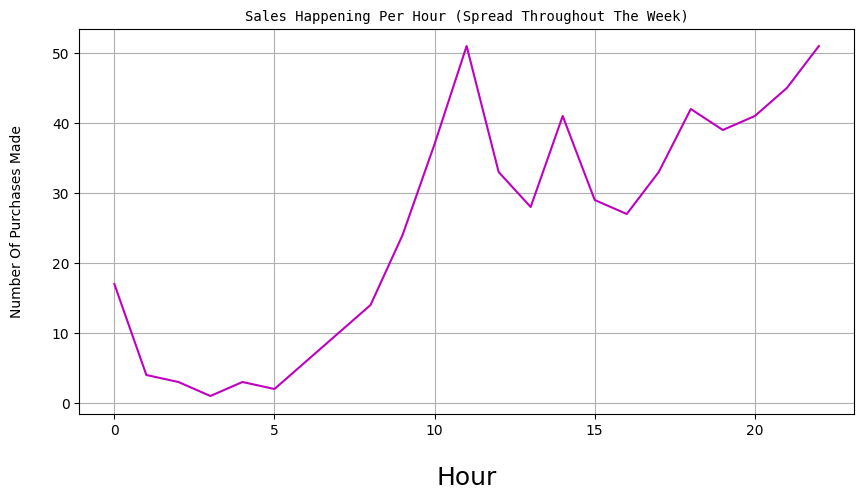

In [28]:
plt.figure(figsize=(10,5))
plt.title('Sales Happening Per Hour (Spread Throughout The Week)',fontdict={'fontname': 'monospace', 'fontsize': 10}, y=1.0)
plt.ylabel("Number Of Purchases Made", fontsize=10, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()